In [2]:
! git clone https://github.com/FlashChoi5657/Lung_segmentation

Cloning into 'Lung_segmentation'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 46 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 68.65 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
!pip install livelossplot --quiet

In [4]:
# 현재 위치의 파일 및 폴더 리스트 출력
!ls

Lung_segmentation  sample_data


In [5]:
!pwd

/content


In [6]:
# 데이터셋 다운로드 (깃허브)
!rm -rf *
!git clone https://github.com/FlashChoi5657/Lung_segmentation.git

Cloning into 'Lung_segmentation'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 46 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 68.65 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [7]:
# 데이터셋 압축풀기
%cd Lung_segmentation
!cat images.tar.gz* | tar -zxvpf -
!cat masks.tar.gz* | tar -zxvpf -
!rm *
%cd ..

/content/Lung_segmentation
images/
images/CHNCXR_0001_0.png
images/CHNCXR_0002_0.png
images/CHNCXR_0003_0.png
images/CHNCXR_0004_0.png
images/CHNCXR_0005_0.png
images/CHNCXR_0006_0.png
images/CHNCXR_0007_0.png
images/CHNCXR_0008_0.png
images/CHNCXR_0009_0.png
images/CHNCXR_0010_0.png
images/CHNCXR_0011_0.png
images/CHNCXR_0012_0.png
images/CHNCXR_0013_0.png
images/CHNCXR_0014_0.png
images/CHNCXR_0015_0.png
images/CHNCXR_0016_0.png
images/CHNCXR_0017_0.png
images/CHNCXR_0018_0.png
images/CHNCXR_0019_0.png
images/CHNCXR_0020_0.png
images/CHNCXR_0021_0.png
images/CHNCXR_0022_0.png
images/CHNCXR_0023_0.png
images/CHNCXR_0024_0.png
images/CHNCXR_0026_0.png
images/CHNCXR_0027_0.png
images/CHNCXR_0028_0.png
images/CHNCXR_0029_0.png
images/CHNCXR_0030_0.png
images/CHNCXR_0031_0.png
images/CHNCXR_0032_0.png
images/CHNCXR_0033_0.png
images/CHNCXR_0034_0.png
images/CHNCXR_0035_0.png
images/CHNCXR_0041_0.png
images/CHNCXR_0042_0.png
images/CHNCXR_0043_0.png
images/CHNCXR_0044_0.png
images/CHNCXR_0

In [8]:
!ls Lung_segmentation

images	masks


In [9]:
# load library
import numpy as np
import os
import glob
import cv2

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

data_path = "./Lung_segmentation/"

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1


x_list = sorted(glob.glob(data_path+'images/*'))
y_list = sorted(glob.glob(data_path+'masks/*'))
print(len(x_list),len(y_list),x_list[:4],y_list[:4])


539 539 ['./Lung_segmentation/images/CHNCXR_0001_0.png', './Lung_segmentation/images/CHNCXR_0002_0.png', './Lung_segmentation/images/CHNCXR_0003_0.png', './Lung_segmentation/images/CHNCXR_0004_0.png'] ['./Lung_segmentation/masks/CHNCXR_0001_0_mask.png', './Lung_segmentation/masks/CHNCXR_0002_0_mask.png', './Lung_segmentation/masks/CHNCXR_0003_0_mask.png', './Lung_segmentation/masks/CHNCXR_0004_0_mask.png']


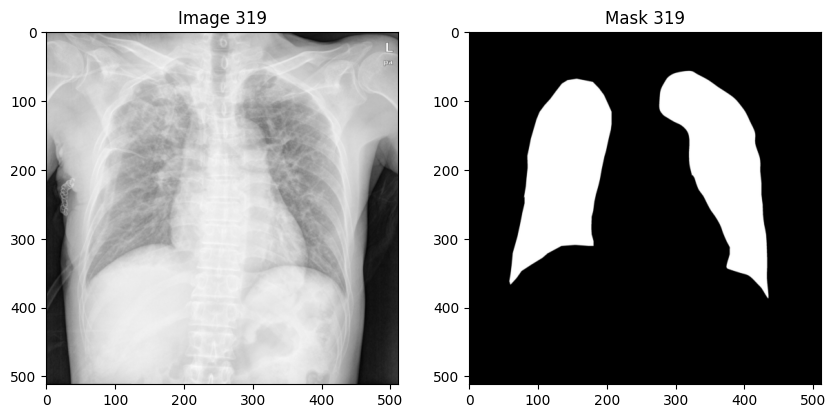

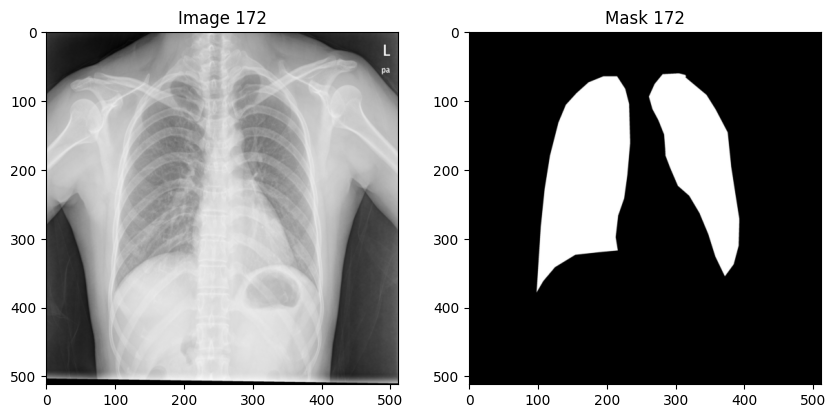

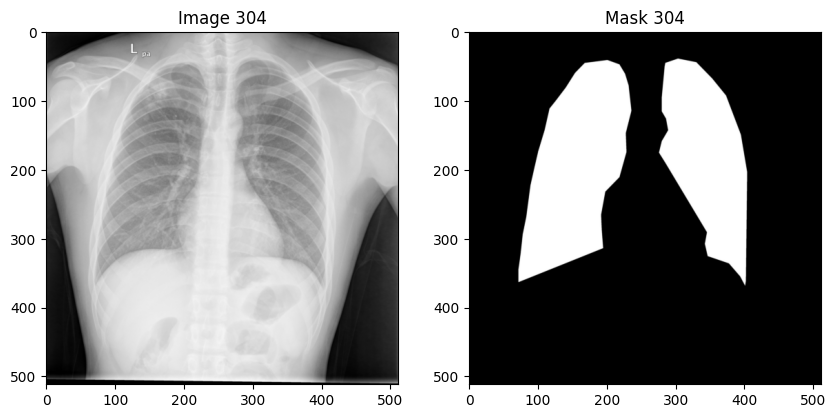

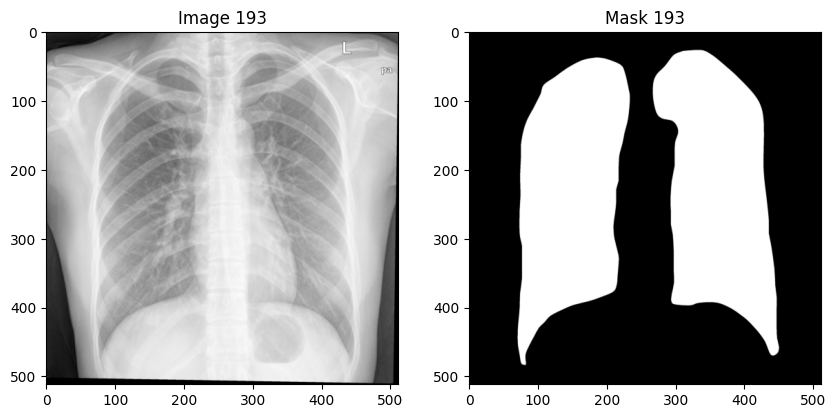

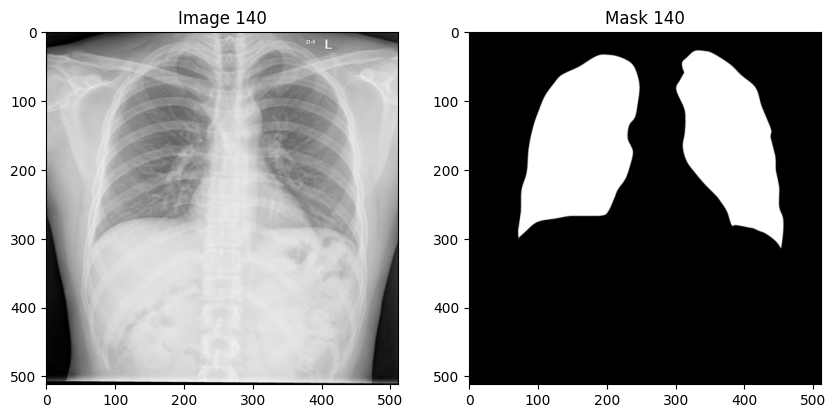

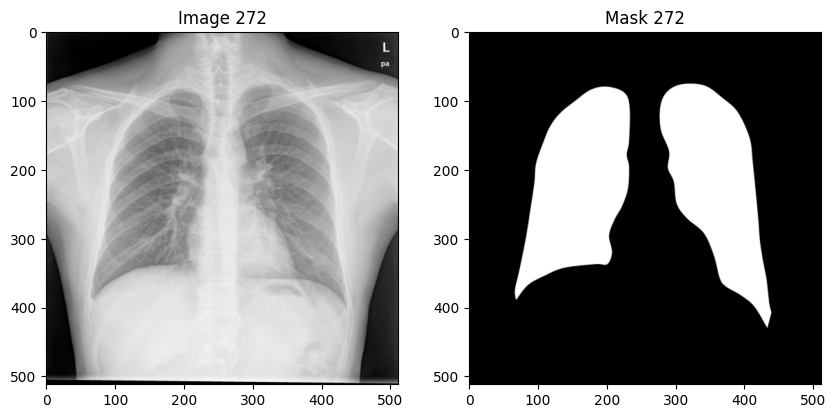

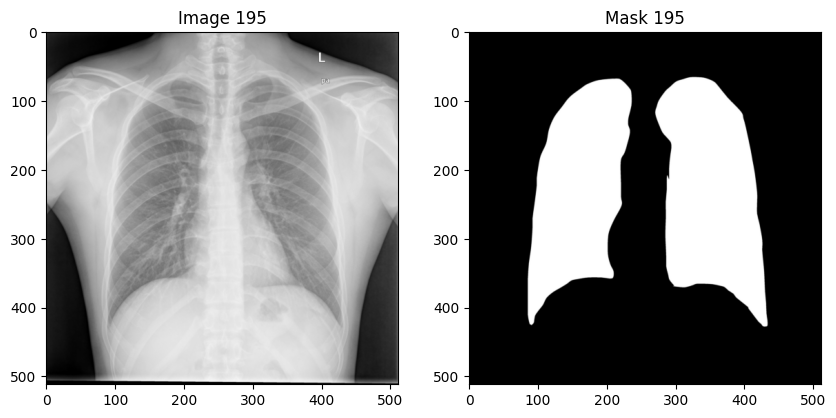

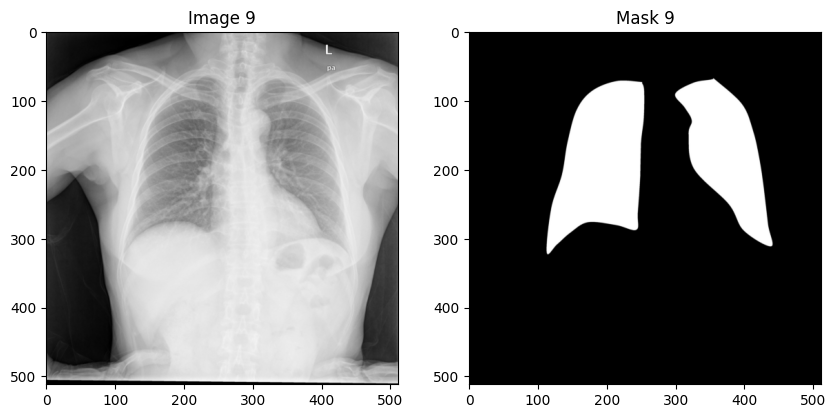

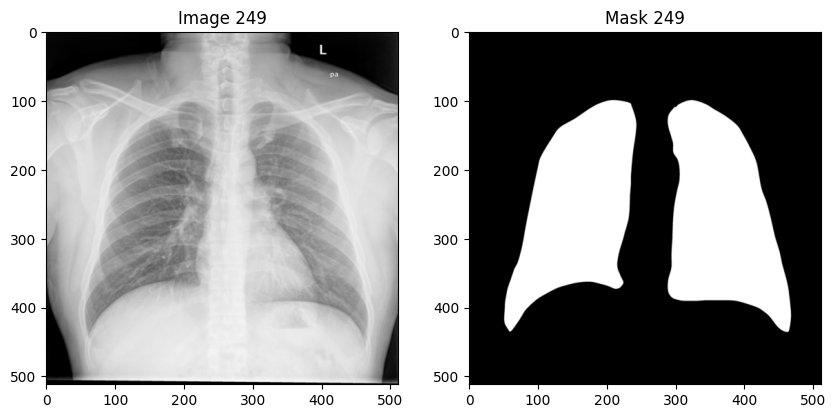

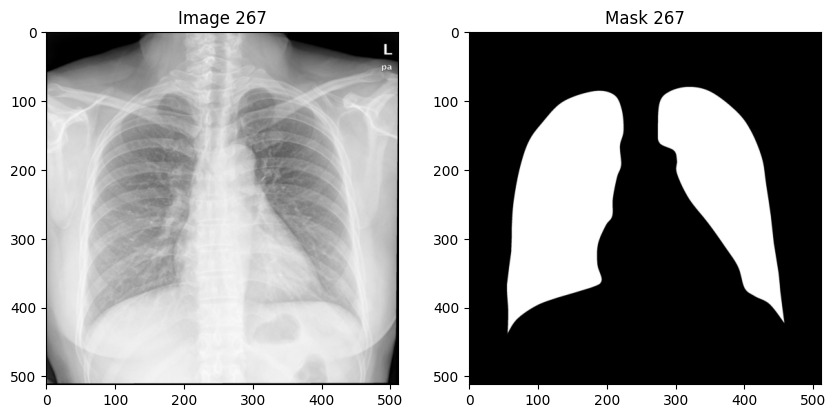

In [10]:

import matplotlib.pyplot as plt
import random

# Display 10 random images and their corresponding masks
random_indices = random.sample(range(len(x_list)), 10)

for i in random_indices:
    image = imread(x_list[i])
    mask = imread(y_list[i])

    # Display the image and mask side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f"Image {i}")
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title(f"Mask {i}")
    plt.show()

In [11]:
X_all = np.zeros((len(x_list), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint16)
y_all = np.zeros((len(y_list), IMG_HEIGHT, IMG_WIDTH, 1),  dtype=bool)

for idx in range(len(x_list)):

    img = cv2.imread(x_list[idx], cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_COLOR > (width, height, 3) , cv2.IMREAD_GRAYSCALE > (width, height)
    img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
    img = np.expand_dims(img, -1)

    mask = imread(y_list[idx])
    mask = cv2.resize(mask,(IMG_WIDTH,IMG_HEIGHT))
    mask = np.expand_dims(mask, axis=-1)

    X_all[idx] = img
    y_all[idx] = mask

In [12]:
X_all.shape, y_all.shape

((539, 128, 128, 1), (539, 128, 128, 1))

In [13]:
import matplotlib.pyplot as plt

# 해당 데이터셋의 랜덤 이미지 보기
def plotTrainData(a,b,c):
    for i in range(3):
        ix = np.random.randint(0, len(a))
        plt.subplot(1,2,1)
        plt.title("X_" + c)
        plt.imshow(np.squeeze(a[ix]), cmap='gray')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.title("y_" + c)
        plt.imshow(np.squeeze(b[ix]), cmap='gray')
        plt.axis('off')
        plt.show()

# 상위 a, 하위 b 퍼센트 cutoff 하기
def image_preprocess_float(x,x_cutoff_max=100,x_cutoff_min=0):
    """
    Scale image to range 0..1 for correct plot
    """
    x_max = np.percentile(x, x_cutoff_max)
    x_min = np.percentile(x, x_cutoff_min)

    if x_max - x_min != 0:
        x = (x - x_min) / (x_max - x_min)
        x = x.clip(0, 1).astype('float32')
    elif x_max - x_min == 0:
        x = np.zeros_like(x)
    return x

In [14]:
# 8bit 이미지를 255로 나누기 (0,1,...255) --> (0,...,1)
X_all = X_all.astype('float32') / 255.

# 8bit 이미지에서 상위 2% 하위 2% 제외하고 0~1사이로 정규화 (0,1,...255) --> (0,...,1)
X_all = image_preprocess_float(X_all,98,2)

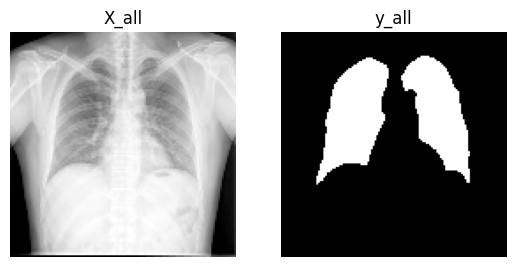

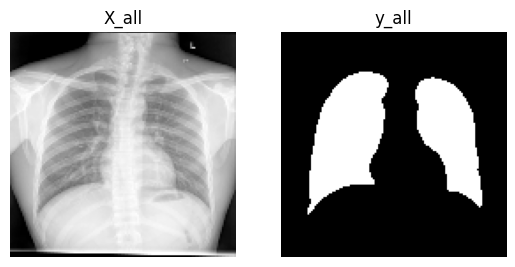

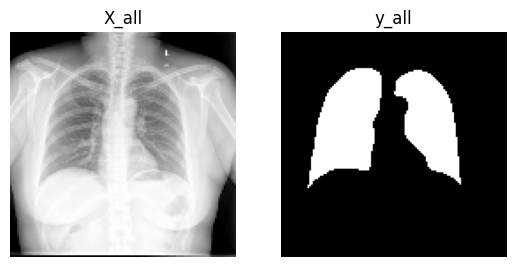

In [15]:
plotTrainData(X_all, y_all, 'all')

In [16]:
# fix random seed for reproductibility
seed = 5
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [17]:

# fix random seed for reproductibility
seed = 5
np.random.seed(seed)

# X_train에서 임의의 100개 데이터 선택
random_indices = np.random.choice(X_train.shape[0], 100, replace=False)
X_train = X_train[random_indices]
y_train = y_train[random_indices]

In [18]:
# Check the shape of input
# image input for Keras (N:sample,H:Height,W:Width,C:Channel)
# image input for Pytorch (N:sample,C:Channel,H:Height,W:Width)

print('X_train',X_train.shape)
print('X_valid',X_valid.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_valid',y_valid.shape)
print('y_test',y_test.shape)

X_train (100, 128, 128, 1)
X_valid (49, 128, 128, 1)
X_test (54, 128, 128, 1)
y_train (100, 128, 128, 1)
y_valid (49, 128, 128, 1)
y_test (54, 128, 128, 1)


In [19]:
!pip install seaborn


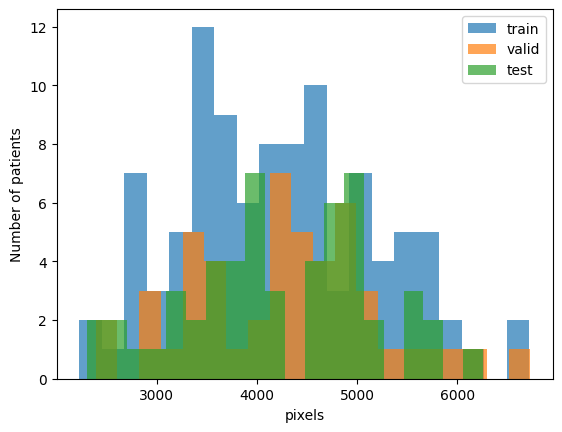

In [20]:
import matplotlib.pyplot as plt
# 데이터셋별 pixel수 비교

y_pixel_train = []
y_pixel_valid = []
y_pixel_test = []

for idx in range(len(y_train)):
  y_pixel_train.append(np.count_nonzero(y_train[idx]))

for idx in range(len(y_valid)):
  y_pixel_valid.append(np.count_nonzero(y_valid[idx]))

for idx in range(len(y_test)):
  y_pixel_test.append(np.count_nonzero(y_test[idx]))

plt.style.use('default')
plt.hist(y_pixel_train,bins=20,alpha=0.7,label='train')
plt.hist(y_pixel_valid,bins=20,alpha=0.7,label='valid')
plt.hist(y_pixel_test,bins=20,alpha=0.7,label='test')
plt.xlabel('pixels')
plt.ylabel('Number of patients')
plt.legend()

In [21]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, BatchNormalization, Cropping2D

def unet(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    # Contracting Path
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)

    # Expanding Path
    up7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv5)
    # Remove Cropping2D or adjust cropping to match shapes
    # up7 = Cropping2D(((1, 0), (1, 0)))(up7)  # 크기 조정 - This line caused the shape mismatch
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])




In [22]:
model = unet()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 128)    │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 32, 128)    │            512 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2      

 Total params: 1,930,657 (7.36 MB)

 Trainable params: 1,927,841 (7.35 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [49]:
# import tensorflow.keras.backend as K  # Import from tensorflow.keras.backend

# def dice_coef(y_true, y_pred):
#     y_true_f = K.cast(y_true, dtype='float32') # Now K.cast should work correctly
#     y_true_f = K.flatten(y_true_f)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)

# def dice_coef_loss(y_true, y_pred):
#     return -dice_coef(y_true, y_pred)

In [23]:
import tensorflow.keras.backend as K  # TensorFlow의 Keras 백엔드 사용

def dice_coef(y_true, y_pred, smooth=1e-6):
    """
    Dice Coefficient 계산 함수.
    y_true: 실제 마스크 (ground truth)
    y_pred: 예측 마스크 (model prediction)
    smooth: 0으로 나누는 것을 방지하기 위한 작은 값
    """
    # y_true를 float32로 변환
    y_true_f = K.cast(y_true, dtype='float32')

    # y_true와 y_pred를 1D 벡터로 변환
    y_true_f = K.flatten(y_true_f)
    y_pred_f = K.flatten(y_pred)

    # 교집합(intersection) 계산
    intersection = K.sum(y_true_f * y_pred_f)

    # Dice Coefficient 계산
    return (2.0 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    """
    Dice Loss 계산 함수.
    Dice Coefficient의 음수를 반환하여 손실로 사용.
    """
    return 1 - dice_coef(y_true, y_pred)  # 기존 -dice_coef를 1 - dice_coef로 변경

In [24]:
# visualizer
from livelossplot import PlotLossesKeras
import tensorflow as tf

plotlosses = PlotLossesKeras()

# build the model
model = unet()
adam = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-6)
model.compile(loss=dice_coef_loss, optimizer=adam, metrics=['accuracy',dice_coef])

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# hyper parameter
batch_size = 16
epochs=30

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


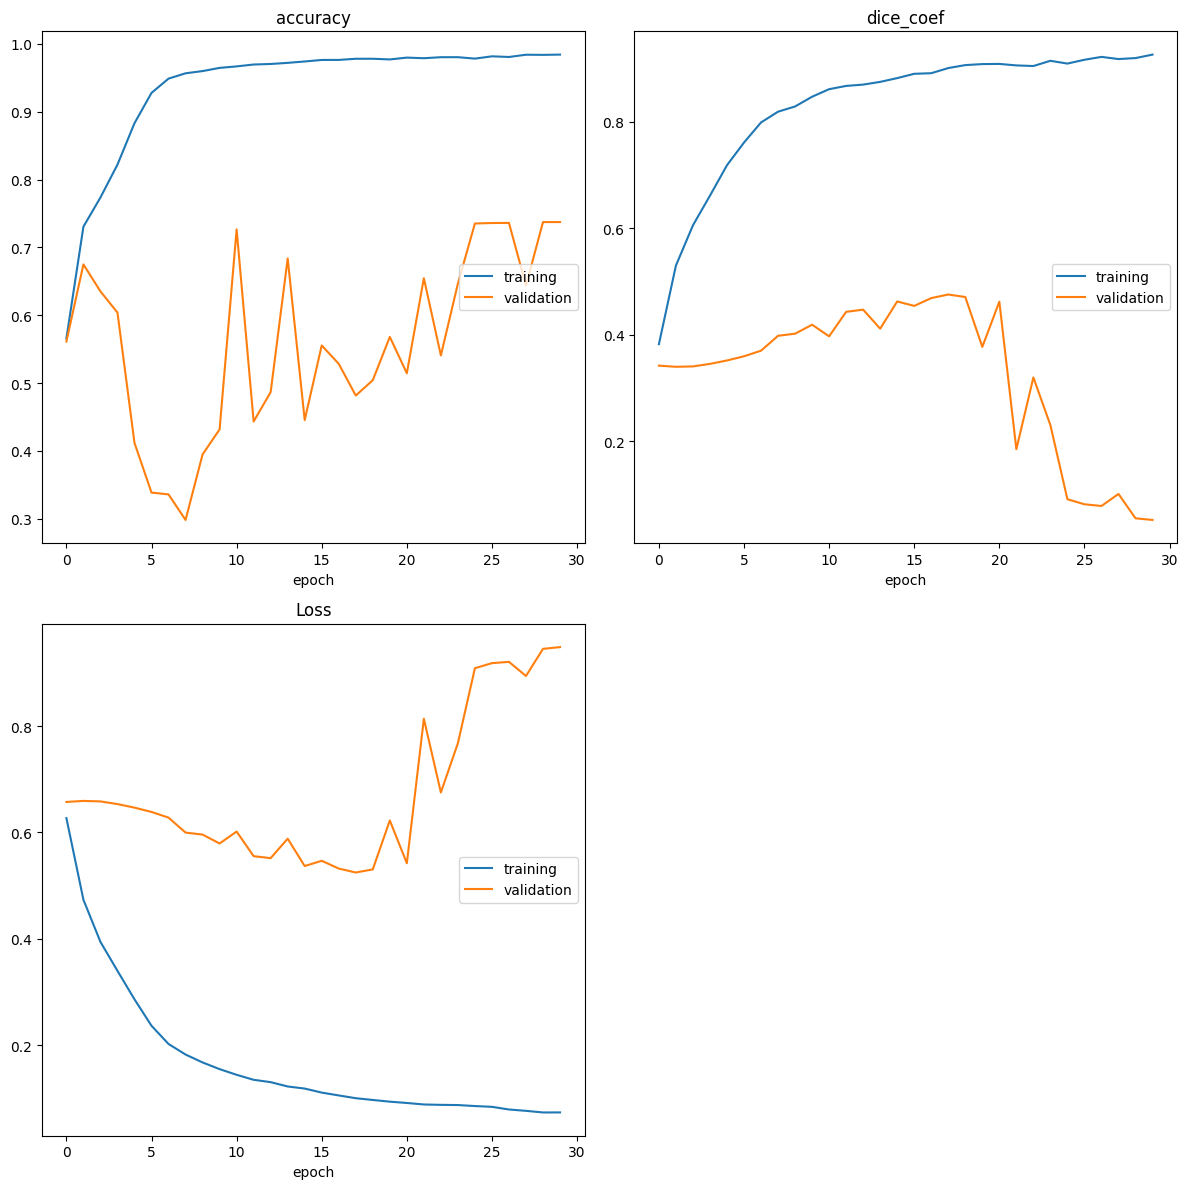

accuracy
	training         	 (min:    0.566, max:    0.984, cur:    0.984)
	validation       	 (min:    0.298, max:    0.737, cur:    0.737)
dice_coef
	training         	 (min:    0.382, max:    0.927, cur:    0.927)
	validation       	 (min:    0.052, max:    0.476, cur:    0.052)
Loss
	training         	 (min:    0.074, max:    0.627, cur:    0.074)
	validation       	 (min:    0.525, max:    0.948, cur:    0.948)
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9841 - dice_coef: 0.9290 - loss: 0.0712 - val_accuracy: 0.7373 - val_dice_coef: 0.0517 - val_loss: 0.9482


In [25]:
# FIT THE MODEL - OPTIMIZATION
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[plotlosses])
model.save('unet.h5')

In [28]:
# import matplotlib.pyplot as plt
# import numpy as np

# def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, unet):
#     model = unet  # U-Net 모델

#     # 학습 데이터
#     ix = np.random.randint(0, len(X_train_))
#     input_ = X_train_[ix:ix+1]
#     mask_ = y_train_[ix:ix+1]
#     preds_train = model.predict(input_)
#     preds_train_t = (preds_train > 0.03).astype(np.uint8)

#     plt.figure(figsize=(10, 10))
#     plt.subplot(1, 3, 1)
#     plt.title("X_train")
#     plt.axis('off')
#     plt.imshow(input_[0][:, :, 0], 'gray')
#     plt.subplot(1, 3, 2)
#     plt.title("Y_train")
#     plt.axis('off')
#     plt.imshow(mask_[0][:, :, 0], 'gray')
#     plt.subplot(1, 3, 3)
#     ret = model.evaluate(input_, mask_, verbose=0)
#     plt.title(f"Prediction: {ret[1]:.4f}")
#     plt.axis('off')
#     plt.imshow(preds_train_t[0][:, :, 0], 'gray')
#     plt.tight_layout()  # 레이아웃 자동 조정
#     plt.subplots_adjust(top=0.88, wspace=0.3)  # 제목과 플롯 사이 간격 조정
#     plt.suptitle(f"Train Dataset Sample #{ix}", fontsize=16)  # y로 위치 조정
#     plt.show()

#     # 검증 데이터
#     ix = np.random.randint(0, len(X_valid_))
#     input_ = X_valid_[ix:ix+1]
#     mask_ = y_valid_[ix:ix+1]
#     preds_valid = model.predict(input_)
#     preds_valid_t = (preds_valid > 0.03).astype(np.uint8)
#     plt.figure(figsize=(10, 10))
#     plt.suptitle(f"Validation Dataset Sample #{ix}", y=0.92, fontsize=16)  # y로 위치 조정
#     plt.subplot(1, 3, 1)
#     plt.title("X_valid")
#     plt.axis('off')
#     plt.imshow(input_[0][:, :, 0], 'gray')
#     plt.subplot(1, 3, 2)
#     plt.title("Y_valid")
#     plt.axis('off')
#     plt.imshow(mask_[0][:, :, 0], 'gray')
#     plt.subplot(1, 3, 3)
#     ret = model.evaluate(input_, mask_, verbose=0)
#     plt.title(f"Prediction: {ret[1]:.4f}")
#     plt.axis('off')
#     plt.imshow(preds_valid_t[0][:, :, 0], 'gray')
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.88)
#     plt.show()

#     # 테스트 데이터
#     ix = np.random.randint(0, len(X_test_))
#     input_ = X_test_[ix:ix+1]
#     mask_ = y_test_[ix:ix+1]
#     preds_test = model.predict(input_)
#     preds_test_t = (preds_test > 0.03).astype(np.uint8)
#     plt.figure(figsize=(10, 10))
#     plt.suptitle(f"Test Dataset Sample #{ix}", y=0.92, fontsize=16)  # y로 위치 조정
#     plt.subplot(1, 3, 1)
#     plt.title("X_test")
#     plt.axis('off')
#     plt.imshow(input_[0][:, :, 0], 'gray')
#     plt.subplot(1, 3, 2)
#     plt.title("Y_test")
#     plt.axis('off')
#     plt.imshow(mask_[0][:, :, 0], 'gray')
#     plt.subplot(1, 3, 3)
#     ret = model.evaluate(input_, mask_, verbose=0)
#     plt.title(f"Prediction: {ret[1]:.4f}")
#     plt.axis('off')
#     plt.imshow(preds_test_t[0][:, :, 0], 'gray')
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.88)
#     plt.show()


In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, unet):
    """
    항상 17번 샘플의 데이터를 출력하는 함수.

    Args:
        X_train_, y_train_: 학습 데이터와 마스크
        X_valid_, y_valid_: 검증 데이터와 마스크
        X_test_, y_test_: 테스트 데이터와 마스크
        unet: U-Net 모델
    """
    model = unet  # U-Net 모델

    # 고정된 이미지 번호
    sample_number = 17  # 항상 17번 데이터를 사용

    def plot_sample(data_type, X_data, y_data):
        """
        데이터셋 내 특정 번호(17번)의 데이터를 시각화.
        """
        # 선택한 데이터 가져오기
        input_ = X_data[sample_number:sample_number + 1]
        mask_ = y_data[sample_number:sample_number + 1]
        preds = model.predict(input_)
        preds_t = (preds > 0.03).astype(np.uint8)

        # 평가 지표 계산
        ret = model.evaluate(input_, mask_, verbose=0)

        # 시각화
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 3, 1)
        plt.title(f"X_{data_type}")
        plt.axis('off')
        plt.imshow(input_[0][:, :, 0], cmap='gray')

        plt.subplot(1, 3, 2)
        plt.title(f"Y_{data_type}")
        plt.axis('off')
        plt.imshow(mask_[0][:, :, 0], cmap='gray')

        plt.subplot(1, 3, 3)
        plt.title(f"Prediction: {ret[1]:.4f}")
        plt.axis('off')
        plt.imshow(preds_t[0][:, :, 0], cmap='gray')

        plt.tight_layout()

        plt.show()

    # 학습 데이터 시각화
    plot_sample("Train", X_train_, y_train_)

    # 검증 데이터 시각화
    plot_sample("Validation", X_valid_, y_valid_)

    # 테스트 데이터 시각화
    plot_sample("Test", X_test_, y_test_)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


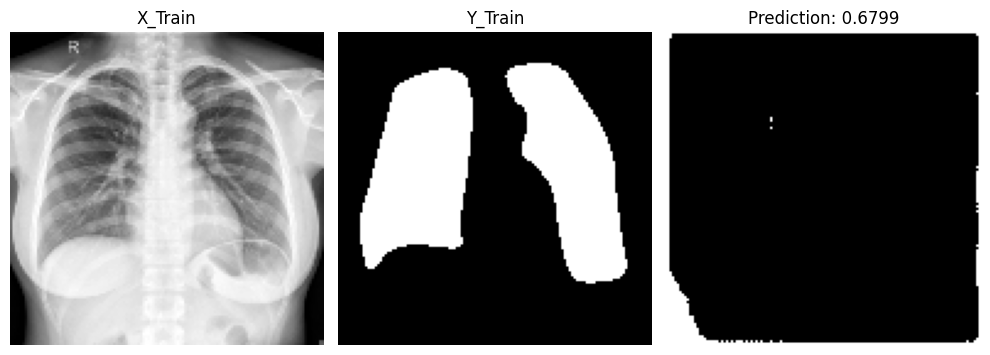

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


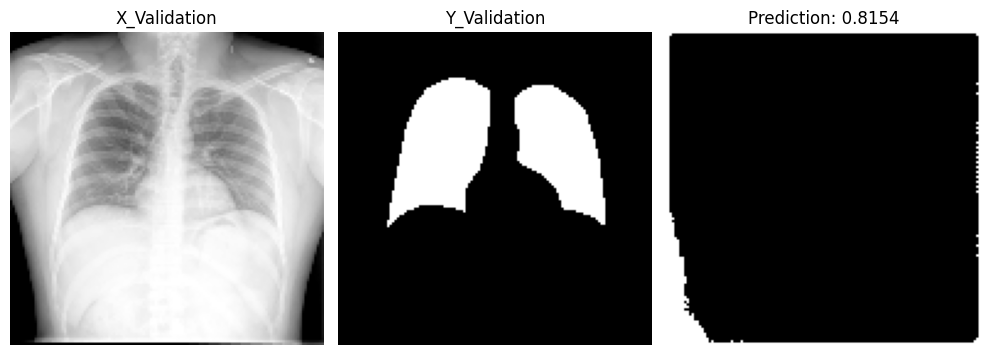

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


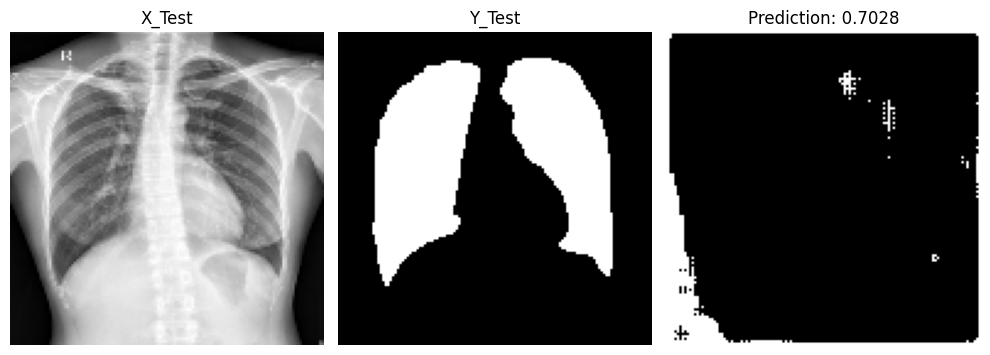

In [28]:
plotPredictions(X_train, y_train, X_valid, y_valid, X_test, y_test, model)

In [30]:
loss, accuracy, dice_coef = model.evaluate(X_train, y_train, verbose=1)
print(f"Training Loss: {loss}, Training Accuracy: {accuracy}, Training Dice Coefficient: {dice_coef}")

loss, accuracy, dice_coef = model.evaluate(X_valid, y_valid, verbose=1)
print(f"Training Loss: {loss}, Training Accuracy: {accuracy}, Training Dice Coefficient: {dice_coef}")

loss, accuracy, dice_coef = model.evaluate(X_test, y_test, verbose=1)
print(f"Training Loss: {loss}, Training Accuracy: {accuracy}, Training Dice Coefficient: {dice_coef}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - accuracy: 0.7406 - dice_coef: 0.0517 - loss: 0.9483
Training Loss: 0.9483456611633301, Training Accuracy: 0.7413238286972046, Training Dice Coefficient: 0.051685526967048645
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7386 - dice_coef: 0.0518 - loss: 0.9482
Training Loss: 0.9481701254844666, Training Accuracy: 0.7373196482658386, Training Dice Coefficient: 0.051864102482795715
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7397 - dice_coef: 0.0518 - loss: 0.9482
Training Loss: 0.9482787847518921, Training Accuracy: 0.7412278652191162, Training Dice Coefficient: 0.05167324095964432


In [32]:
from sklearn.metrics import precision_score, recall_score, jaccard_score
import numpy as np

def calculate_metrics(y_true, y_pred, threshold=0.5):
    """
    Calculate Precision, Recall, and IoU (Jaccard Index) for segmentation masks.

    Args:
        y_true (numpy.ndarray): Ground truth masks.
        y_pred (numpy.ndarray): Predicted masks.
        threshold (float): Threshold to binarize predictions.

    Returns:
        precision, recall, iou: Calculated metrics.
    """
    # Flatten the arrays for metric calculation
    y_true = y_true.flatten()
    y_pred = (y_pred.flatten() > threshold).astype(int)

    # Precision, Recall, and IoU
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    iou = jaccard_score(y_true, y_pred)

    return precision, recall, iou


# Evaluate model on training, validation, and test data
datasets = {
    "Training": (X_train, y_train),
    "Validation": (X_valid, y_valid),
    "Testing": (X_test, y_test)
}

for dataset_name, (X, y) in datasets.items():
    # Evaluate model (Loss, Accuracy, Dice Coefficient)
    loss, accuracy, dice_coef = model.evaluate(X, y, verbose=1)
    print(f"{dataset_name} Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Dice Coefficient: {dice_coef:.4f}")

    # Get model predictions
    y_pred = model.predict(X)




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7406 - dice_coef: 0.0517 - loss: 0.9483
Training Loss: 0.9483, Accuracy: 0.7413, Dice Coefficient: 0.0517
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7386 - dice_coef: 0.0518 - loss: 0.9482
Validation Loss: 0.9482, Accuracy: 0.7373, Dice Coefficient: 0.0519
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7397 - dice_coef: 0.0518 - loss: 0.9482
Testing Loss: 0.9483, Accuracy: 0.7412, Dice Coefficient: 0.0517
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [33]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, BatchNormalization, Dropout

def vgg16_unet(input_size=(128, 128, 3)):
    # Load VGG16 with pretrained weights (imagenet) and exclude top layers
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_size)

    # Extract VGG16 layers for U-Net Contracting Path
    inputs = vgg16_base.input
    conv1 = vgg16_base.get_layer("block1_conv2").output  # (128, 128, 64)
    pool1 = vgg16_base.get_layer("block1_pool").output   # (64, 64, 64)
    conv2 = vgg16_base.get_layer("block2_conv2").output  # (64, 64, 128)
    pool2 = vgg16_base.get_layer("block2_pool").output   # (32, 32, 128)
    conv3 = vgg16_base.get_layer("block3_conv3").output  # (32, 32, 256)
    pool3 = vgg16_base.get_layer("block3_pool").output   # (16, 16, 256)
    conv4 = vgg16_base.get_layer("block4_conv3").output  # (16, 16, 512)
    pool4 = vgg16_base.get_layer("block4_pool").output   # (8, 8, 512)

    # Center part (bottleneck)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)

    # Expanding Path
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    # Output layer
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

# Model 생성
model = vgg16_unet(input_size=(128, 128, 3))
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 128, 128, 64)   │          1,792 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 128, 128, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 64, 64, 64)     │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 64, 64, 128)    │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 64, 64, 128)    │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 32, 32, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 32, 32, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 16, 16, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 16, 16, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 8, 8, 512)      │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 8, 8, 1024)     │      4,719,616 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_28    │ (None, 8, 8, 1024)     │          4,096 │ conv2d_30[0][0]        │
│ (BatchNormalization) 

 Total params: 33,997,505 (129.69 MB)

 Trainable params: 33,989,569 (129.66 MB)

 Non-trainable params: 7,936 (31.00 KB)

In [34]:
import numpy as np

# Function to convert grayscale (1-channel) to RGB (3-channel)
def convert_to_rgb(image_dataset):
    """
    Converts grayscale images (128, 128, 1) to RGB images (128, 128, 3).

    Args:
        image_dataset: numpy array of shape (num_samples, height, width, 1).

    Returns:
        Converted dataset of shape (num_samples, height, width, 3).
    """
    return np.repeat(image_dataset, 3, axis=-1)  # Repeat the single channel 3 times




In [35]:
# Convert all datasets
X_train_rgb = convert_to_rgb(X_train)
X_valid_rgb = convert_to_rgb(X_valid)
X_test_rgb = convert_to_rgb(X_test)

print('X_train_rgb shape:', X_train_rgb.shape)
print('X_valid_rgb shape:', X_valid_rgb.shape)
print('X_test_rgb shape:', X_test_rgb.shape)


X_train_rgb shape: (100, 128, 128, 3)
X_valid_rgb shape: (49, 128, 128, 3)
X_test_rgb shape: (54, 128, 128, 3)


In [36]:
import tensorflow.keras.backend as K  # TensorFlow의 Keras 백엔드 사용

def dice_coef(y_true, y_pred, smooth=1e-6):
    """
    Dice Coefficient 계산 함수.
    y_true: 실제 마스크 (ground truth)
    y_pred: 예측 마스크 (model prediction)
    smooth: 0으로 나누는 것을 방지하기 위한 작은 값
    """
    # y_true를 float32로 변환
    y_true_f = K.cast(y_true, dtype='float32')

    # y_true와 y_pred를 1D 벡터로 변환
    y_true_f = K.flatten(y_true_f)
    y_pred_f = K.flatten(y_pred)

    # 교집합(intersection) 계산
    intersection = K.sum(y_true_f * y_pred_f)

    # Dice Coefficient 계산
    return (2.0 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    """
    Dice Loss 계산 함수.
    Dice Coefficient의 음수를 반환하여 손실로 사용.
    """
    return 1 - dice_coef(y_true, y_pred)  # 기존 -dice_coef를 1 - dice_coef로 변경


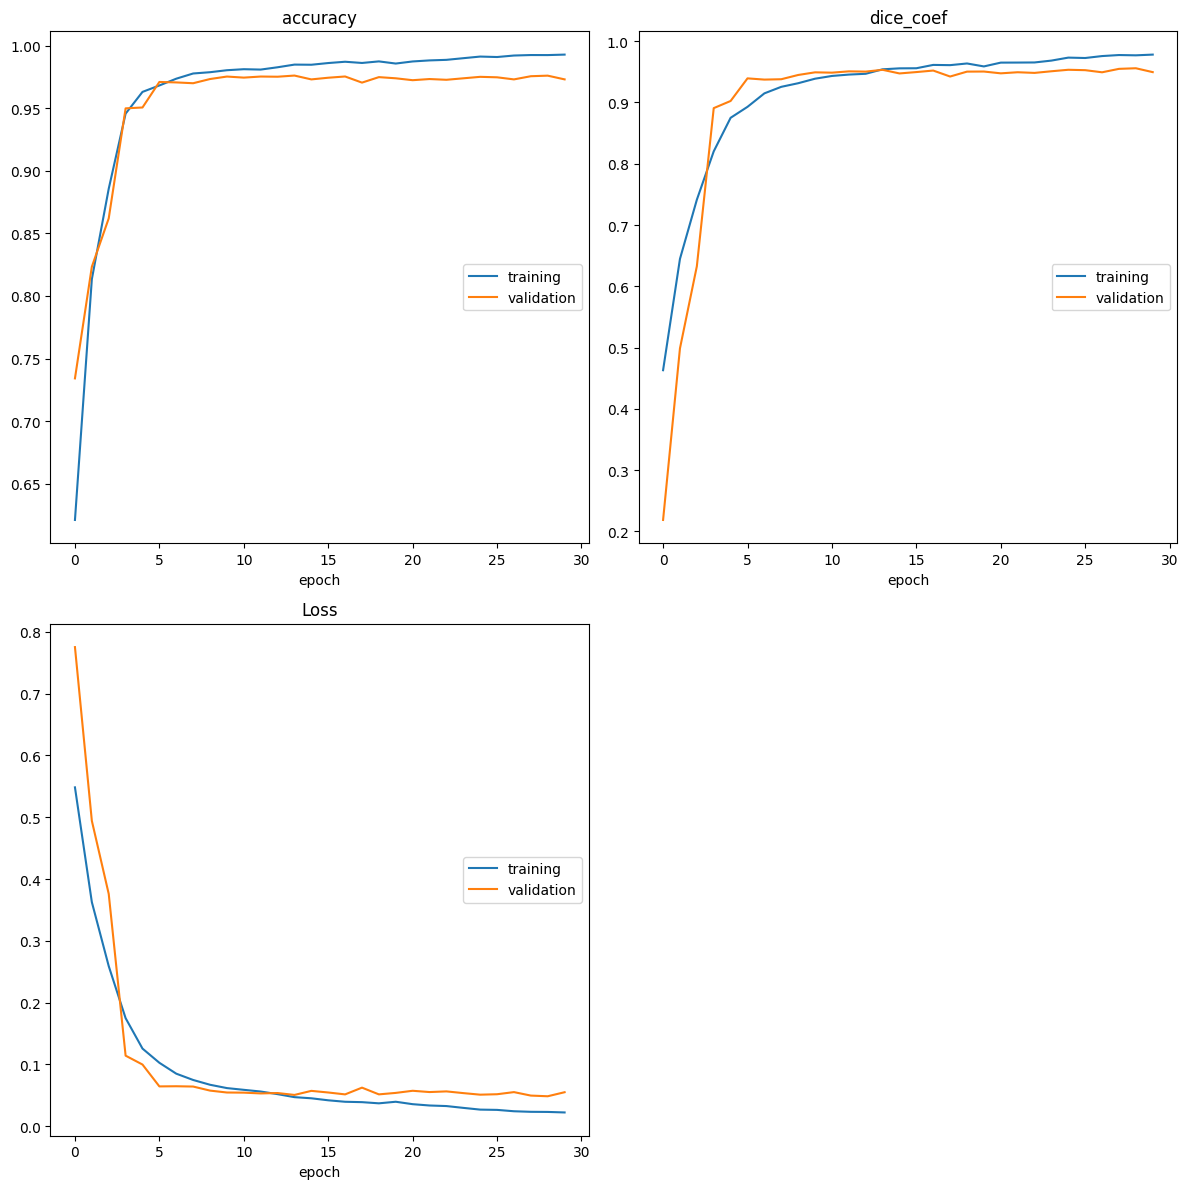

accuracy
	training         	 (min:    0.621, max:    0.993, cur:    0.993)
	validation       	 (min:    0.734, max:    0.976, cur:    0.973)
dice_coef
	training         	 (min:    0.463, max:    0.978, cur:    0.978)
	validation       	 (min:    0.219, max:    0.956, cur:    0.949)
Loss
	training         	 (min:    0.022, max:    0.548, cur:    0.022)
	validation       	 (min:    0.049, max:    0.775, cur:    0.055)
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 410ms/step - accuracy: 0.9930 - dice_coef: 0.9783 - loss: 0.0218 - val_accuracy: 0.9732 - val_dice_coef: 0.9495 - val_loss: 0.0551


In [37]:
# visualizer
from livelossplot import PlotLossesKeras
import tensorflow as tf

vgg16_unet_plotlosses = PlotLossesKeras()

# build the model
model = vgg16_unet(input_size=(128, 128, 3))
adam = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-6)
model.compile(loss=dice_coef_loss, optimizer=adam, metrics=['accuracy',dice_coef])

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# hyper parameter
batch_size = 16
epochs=30

# FIT THE MODEL - OPTIMIZATION
hist = model.fit(X_train_rgb, y_train, validation_data=(X_valid_rgb, y_valid), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[vgg16_unet_plotlosses])
model.save('vgg16_unet.h5')

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, model):
#     """
#     항상 17번 샘플의 데이터를 출력하는 함수.

#     Args:
#         X_train_, y_train_: 학습 데이터와 마스크
#         X_valid_, y_valid_: 검증 데이터와 마스크
#         X_test_, y_test_: 테스트 데이터와 마스크
#         model: vgg16_unet
    # """
def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, unet):
    vgg16_unet(input_size=(128, 128, 3))

    # 고정된 이미지 번호
    sample_number = 17  # 항상 17번 데이터를 사용

    def plot_sample(data_type, X_data, y_data):
        """
        데이터셋 내 특정 번호(17번)의 데이터를 시각화.
        """
        # 선택한 데이터 가져오기
        input_ = X_data[sample_number:sample_number + 1]
        mask_ = y_data[sample_number:sample_number + 1]
        preds = model.predict(input_)
        preds_t = (preds > 0.03).astype(np.uint8)

        # 평가 지표 계산
        ret = model.evaluate(input_, mask_, verbose=0)

        # 시각화
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 3, 1)
        plt.title(f"X_{data_type}")
        plt.axis('off')
        plt.imshow(input_[0][:, :, 0], cmap='gray')

        plt.subplot(1, 3, 2)
        plt.title(f"Y_{data_type}")
        plt.axis('off')
        plt.imshow(mask_[0][:, :, 0], cmap='gray')

        plt.subplot(1, 3, 3)
        plt.title(f"Prediction: {ret[1]:.4f}")
        plt.axis('off')
        plt.imshow(preds_t[0][:, :, 0], cmap='gray')

        plt.tight_layout()
        plt.subplots_adjust(top=0.88, wspace=0.3)
        plt.show()

    # 학습 데이터 시각화
    plot_sample("Train", X_train_, y_train_)

    # 검증 데이터 시각화
    plot_sample("Validation", X_valid_, y_valid_)

    # 테스트 데이터 시각화
    plot_sample("Test", X_test_, y_test_)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


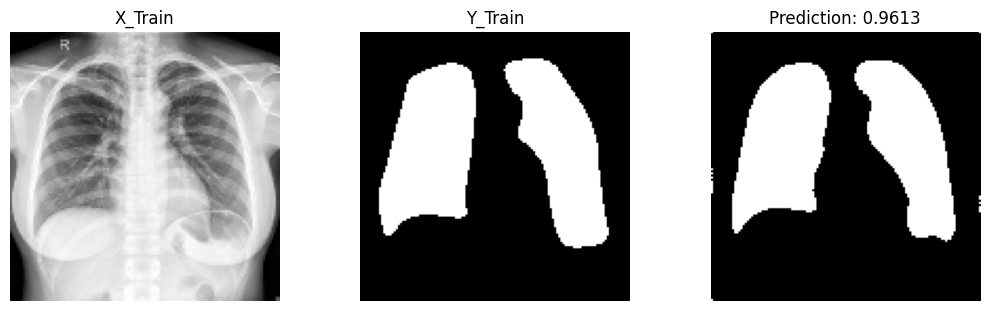

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


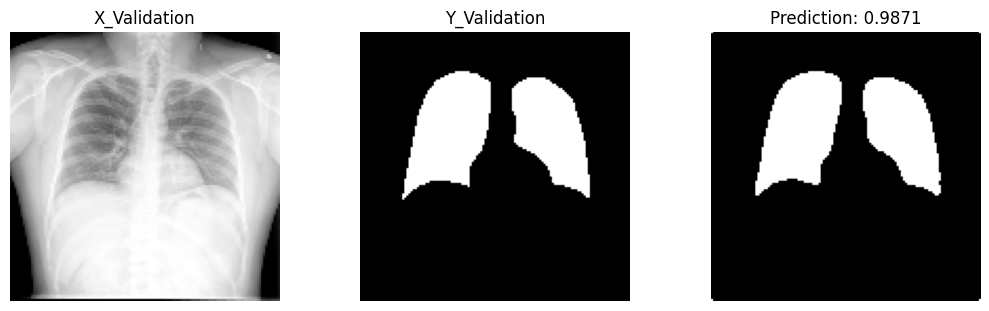

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


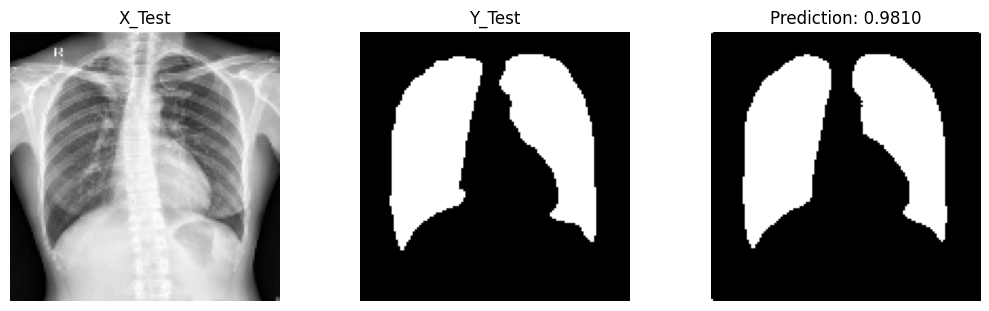

In [39]:
plotPredictions(X_train_rgb, y_train, X_valid_rgb, y_valid, X_test_rgb, y_test, model)

In [41]:
loss, accuracy, dice_coef = model.evaluate(X_train_rgb, y_train, verbose=1)
print(f"Training Loss: {loss}, Training Accuracy: {accuracy}, Training Dice Coefficient: {dice_coef}")

loss, accuracy, dice_coef = model.evaluate(X_valid_rgb, y_valid, verbose=1)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}, Validation Dice Coefficient: {dice_coef}")

loss, accuracy, dice_coef = model.evaluate(X_test_rgb, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}, Test Dice Coefficient: {dice_coef}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9800 - dice_coef: 0.9589 - loss: 0.0417
Training Loss: 0.0413009449839592, Training Accuracy: 0.9803204536437988, Training Dice Coefficient: 0.9602640271186829
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9728 - dice_coef: 0.9446 - loss: 0.0565
Validation Loss: 0.05530785396695137, Validation Accuracy: 0.9732267260551453, Validation Dice Coefficient: 0.9462903738021851
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9740 - dice_coef: 0.9474 - loss: 0.0534
Test Loss: 0.05164530500769615, Test Accuracy: 0.9750739336013794, Test Dice Coefficient: 0.9495630264282227


In [42]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, Dropout, concatenate, Activation

def resnet50_unet(input_size=(128, 128, 3), dropout_rate=0.5):
    """
    ResNet50 기반 U-Net 모델 구현 (전이 학습 포함).
    Args:
        input_size: 입력 이미지 크기 (default: 128x128x3)
        dropout_rate: 드롭아웃 비율 (default: 0.5)
    Returns:
        ResNet50 기반 U-Net 모델.
    """
    # ResNet50을 사전 학습된 가중치로 로드 (ImageNet)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_size)

    # Contracting Path (Encoder)
    inputs = base_model.input
    conv1 = base_model.get_layer("conv1_relu").output  # Stage 1
    conv2 = base_model.get_layer("conv2_block3_out").output  # Stage 2
    conv3 = base_model.get_layer("conv3_block4_out").output  # Stage 3
    conv4 = base_model.get_layer("conv4_block6_out").output  # Stage 4
    conv5 = base_model.get_layer("conv5_block3_out").output  # Stage 5 (bottleneck)

    # Expanding Path (Decoder)
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(dropout_rate)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Dropout(dropout_rate)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Dropout(dropout_rate)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Dropout(dropout_rate)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    # 최종 업샘플링 (64x64 → 128x128)
    up10 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv9)
    conv10 = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(up10)  # 최종 출력 레이어

    # 모델 생성
    model = Model(inputs=[inputs], outputs=[conv10])

    return model

# 모델 생성
model = resnet50_unet(input_size=(128, 128, 3))
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 40,985,857 (156.35 MB)

 Trainable params: 40,928,897 (156.13 MB)

 Non-trainable params: 56,960 (222.50 KB)

In [43]:
import tensorflow.keras.backend as K  # TensorFlow의 Keras 백엔드 사용

def dice_coef(y_true, y_pred, smooth=1e-6):
    """
    Dice Coefficient 계산 함수.
    y_true: 실제 마스크 (ground truth)
    y_pred: 예측 마스크 (model prediction)
    smooth: 0으로 나누는 것을 방지하기 위한 작은 값
    """
    # y_true를 float32로 변환
    y_true_f = K.cast(y_true, dtype='float32')

    # y_true와 y_pred를 1D 벡터로 변환
    y_true_f = K.flatten(y_true_f)
    y_pred_f = K.flatten(y_pred)

    # 교집합(intersection) 계산
    intersection = K.sum(y_true_f * y_pred_f)

    # Dice Coefficient 계산
    return (2.0 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    """
    Dice Loss 계산 함수.
    Dice Coefficient의 음수를 반환하여 손실로 사용.
    """
    return 1 - dice_coef(y_true, y_pred)  # 기존 -dice_coef를 1 - dice_coef로 변경


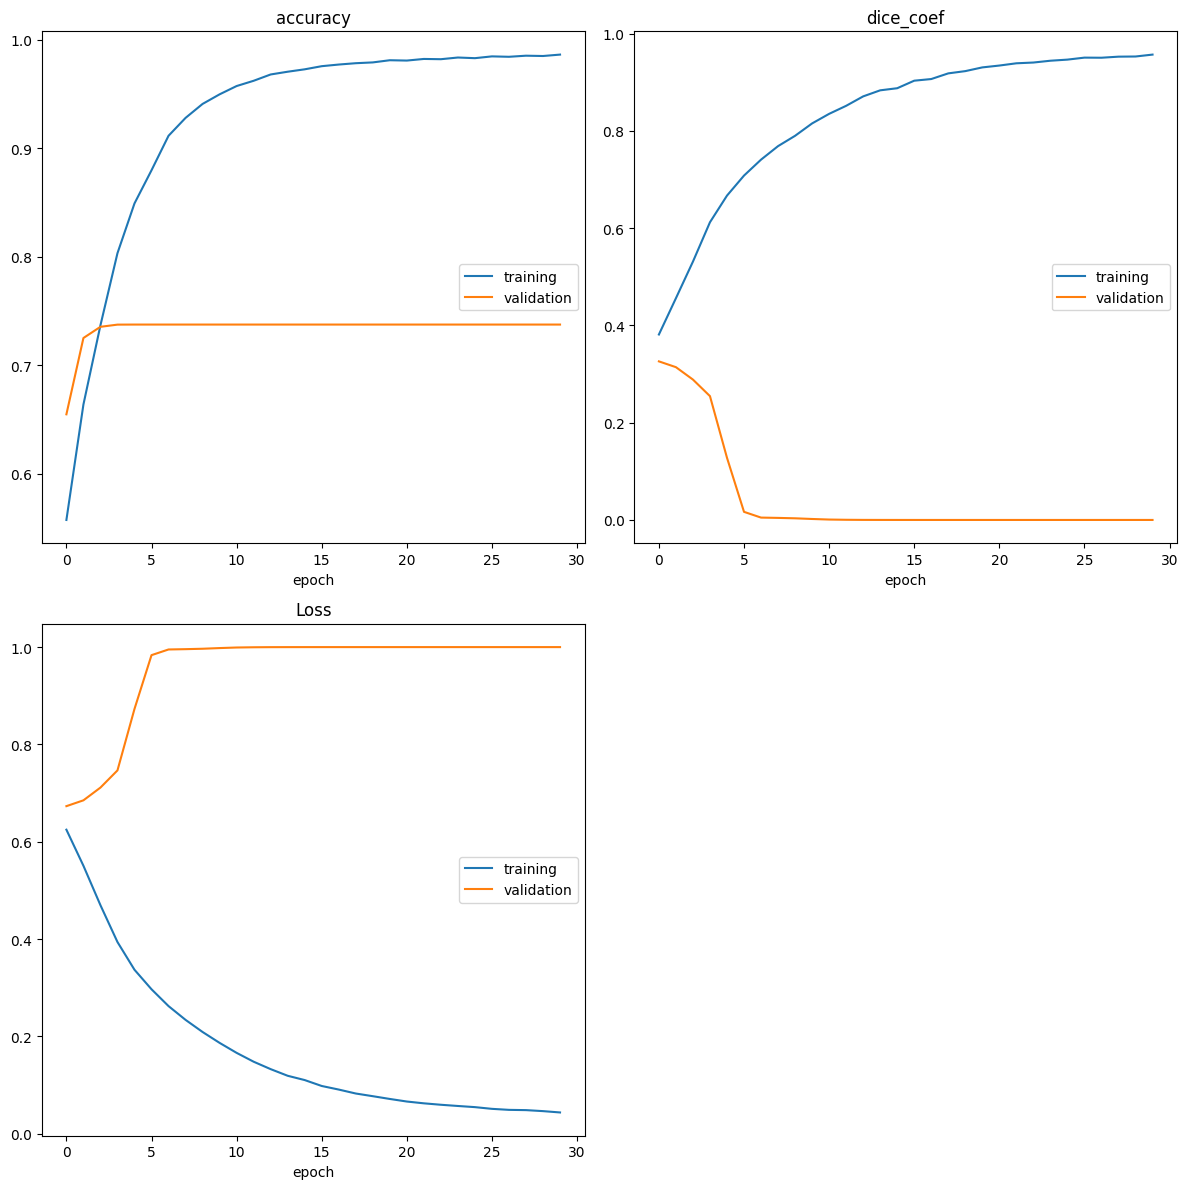

accuracy
	training         	 (min:    0.557, max:    0.986, cur:    0.986)
	validation       	 (min:    0.655, max:    0.737, cur:    0.737)
dice_coef
	training         	 (min:    0.381, max:    0.957, cur:    0.957)
	validation       	 (min:    0.000, max:    0.326, cur:    0.000)
Loss
	training         	 (min:    0.044, max:    0.625, cur:    0.044)
	validation       	 (min:    0.673, max:    1.000, cur:    1.000)
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.9863 - dice_coef: 0.9561 - loss: 0.0441 - val_accuracy: 0.7373 - val_dice_coef: 3.8224e-06 - val_loss: 1.0000


In [44]:
# visualizer
from livelossplot import PlotLossesKeras
import tensorflow as tf

resnet50_unet_plotlosses = PlotLossesKeras()

# build the model
model = resnet50_unet(input_size=(128, 128, 3))
adam = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-6)
model.compile(loss=dice_coef_loss, optimizer=adam, metrics=['accuracy',dice_coef])

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# hyper parameter
batch_size = 16
epochs=30

# FIT THE MODEL - OPTIMIZATION
hist = model.fit(X_train_rgb, y_train, validation_data=(X_valid_rgb, y_valid), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[resnet50_unet_plotlosses])
model.save('resnet50_unet.h5')

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, model):
#     """
#     항상 17번 샘플의 데이터를 출력하는 함수.

#     Args:
#         X_train_, y_train_: 학습 데이터와 마스크
#         X_valid_, y_valid_: 검증 데이터와 마스크
#         X_test_, y_test_: 테스트 데이터와 마스크
#         model: vgg16_unet
    # """
def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, unet):
    resnet50_unet(input_size=(128, 128, 3))

    # 고정된 이미지 번호
    sample_number = 17  # 항상 17번 데이터를 사용

    def plot_sample(data_type, X_data, y_data):
        """
        데이터셋 내 특정 번호(17번)의 데이터를 시각화.
        """
        # 선택한 데이터 가져오기
        input_ = X_data[sample_number:sample_number + 1]
        mask_ = y_data[sample_number:sample_number + 1]
        preds = model.predict(input_)
        preds_t = (preds > 0.03).astype(np.uint8)

        # 평가 지표 계산
        ret = model.evaluate(input_, mask_, verbose=0)

        # 시각화
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 3, 1)
        plt.title(f"X_{data_type}")
        plt.axis('off')
        plt.imshow(input_[0][:, :, 0], cmap='gray')

        plt.subplot(1, 3, 2)
        plt.title(f"Y_{data_type}")
        plt.axis('off')
        plt.imshow(mask_[0][:, :, 0], cmap='gray')

        plt.subplot(1, 3, 3)
        plt.title(f"Prediction: {ret[1]:.4f}")
        plt.axis('off')
        plt.imshow(preds_t[0][:, :, 0], cmap='gray')

        plt.tight_layout()
        plt.subplots_adjust(top=0.88, wspace=0.3)
        plt.show()

    # 학습 데이터 시각화
    plot_sample("Train", X_train_, y_train_)

    # 검증 데이터 시각화
    plot_sample("Validation", X_valid_, y_valid_)

    # 테스트 데이터 시각화
    plot_sample("Test", X_test_, y_test_)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


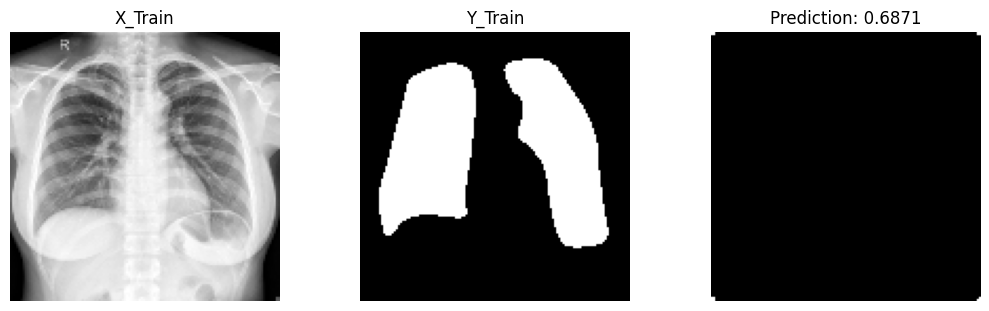

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


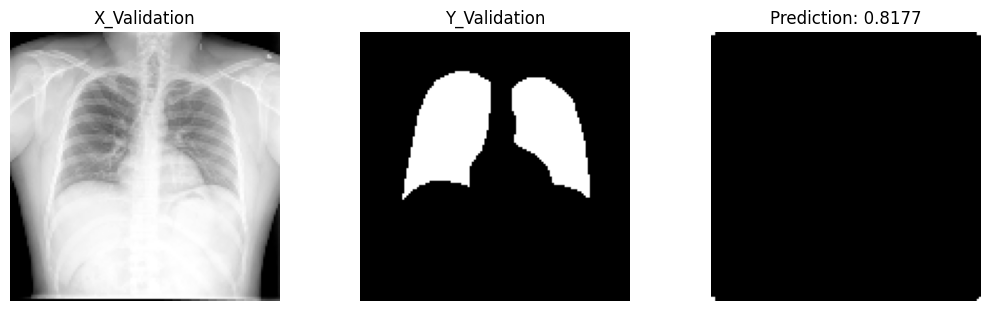

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


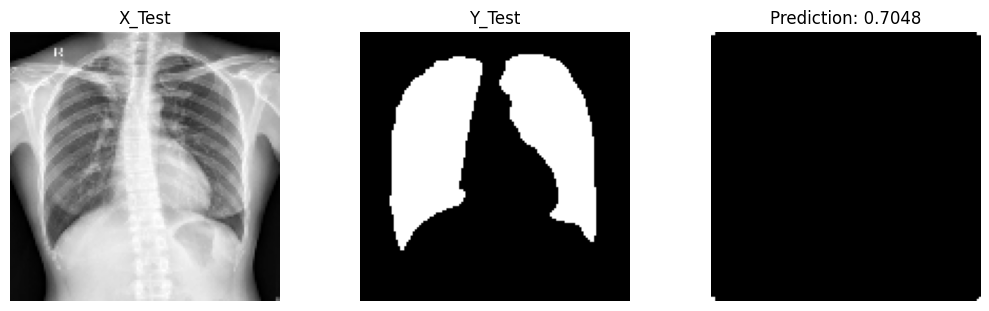

In [46]:
plotPredictions(X_train_rgb, y_train, X_valid_rgb, y_valid, X_test_rgb, y_test, model)

In [47]:
loss, accuracy, dice_coef = model.evaluate(X_train_rgb, y_train, verbose=1)
print(f"Training Loss: {loss}, Training Accuracy: {accuracy}, Training Dice Coefficient: {dice_coef}")

loss, accuracy, dice_coef = model.evaluate(X_valid_rgb, y_valid, verbose=1)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}, Validation Dice Coefficient: {dice_coef}")

loss, accuracy, dice_coef = model.evaluate(X_test_rgb, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}, Test Dice Coefficient: {dice_coef}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7406 - dice_coef: 3.8261e-06 - loss: 1.0000
Training Loss: 0.9999961853027344, Training Accuracy: 0.7413341999053955, Training Dice Coefficient: 3.82952794097946e-06
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7386 - dice_coef: 3.8209e-06 - loss: 1.0000
Validation Loss: 0.9999961853027344, Validation Accuracy: 0.7373196482658386, Validation Dice Coefficient: 3.824728992185555e-06
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7397 - dice_coef: 4.3395e-06 - loss: 1.0000
Test Loss: 0.999995768070221, Test Accuracy: 0.7412606477737427, Test Dice Coefficient: 4.210796305414988e-06
